# Intro

In this Guided Project, we'll:

 - explore why image classification is a hard task
 - observe the limitations of traditional machine learning models for image classification
 - train, test, and improve a few different deep neural networks for image classification
 
History of Deep Neural Networks: https://arxiv.org/pdf/1803.01164.pdf

We'll explore the effectiveness of deep, feedforward neural networks at classifying images.

## Working with Image Data

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of `sklearn.datasets`. The `load_digits()` function returns a copy of the hand-written digits dataset from UCI.

Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions (28 x 28 pixels). 

To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

To reshape the image, we need to convert a training example to a numpy array (excluding the label column) and pass the result into that into the numpy.reshape() function.

Steps:

 - Import `load_digits()` from the `sklearn.datasets` package.
 - Transform the NumPy 2D array into a pandas dataframe.
 - Use matplotlib to visualize some of the images in the dataset.
 - Generate a scatter plot grid, with 2 rows and 4 columns.
   - In the first row:
     - Display the images corresponding to rows 0, 100, 200, and 300.
   - In the second row:
     - Display the images corresponding to rows 1000, 1100, 1200, and 1300.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

digits_data = load_digits()

In [2]:
digits_data.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
labels = pd.Series(digits_data['target'])

In [4]:
data = pd.DataFrame(digits_data['data'])
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


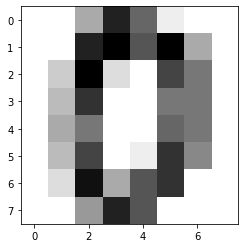

In [5]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)

plt.imshow(np_image, cmap='gray_r')

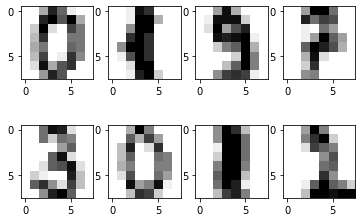

In [7]:
f, axarr = plt.subplots(2, 4)

# Display the images corresponding to rows 0, 100, 200, and 300
axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

# Display the images corresponding to rows 1000, 1100, 1200, and 1300
axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')

## K-Nearest Neighbors Model

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. If you recall, k-nearest neighbors don't have a specific model representation (hence why it's referred to as an algorithm and not a model).

The k-nearest neighbors algorithm compares every unseen observation in the test set to all (or many, as some implementations constrain the search space) training observations to look for similar (or the "nearest") observations. Then, the algorithm finds the label with the most nearby observations and assigns that as the prediction for the unseen observation.

Steps:

 - Split up the data into train and test sets.
 - Setup a pipeline for testing and training k-nn models.
 - Write a function named `train()` that uses `KNeighborsClassifer` for training k-nearest neighbors models.
 - Write a function named test() that tests the model.
 - Write a function named cross_validate() that performs 4-fold cross validation using `train()` and `test()`.
 - Experiment with different values for `k` and plot the resulting classification accuracies.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_knn(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(k):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_knn(k, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies
        
knn_one_accuracies = cross_validate(1)
np.mean(knn_one_accuracies)

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9677233358079684

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_s

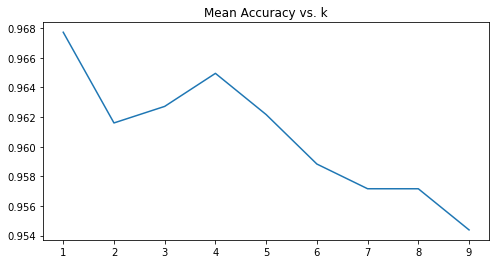

In [9]:
k_values = list(range(1,10))
k_overall_accuracies = []

for k in k_values:
    k_accuracies = cross_validate(k)
    k_mean_accuracy = np.mean(k_accuracies)
    k_overall_accuracies.append(k_mean_accuracy)
    
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. k")
plt.plot(k_values, k_overall_accuracies)

## Neural Network with One Hidden Layer

There are a few downsides to using k-nearest neighbors:

 - high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
 - no model representation to debug and explore

Let's now try a neural network with a single hidden layer. We'll use the `MLPClassifier` package from `scikit-learn`.

Steps:

Using 4-fold cross validation:
 - Train and test a neural network model using a single hidden layer of 8 neurons.
 - Train and test a neural network model using a single hidden layer of 16 neurons.
 - Train and test a neural network model using a single hidden layer of 32 neurons.
 - Train and test a neural network model using a single hidden layer of 64 neurons.
 - Train and test a neural network model using a single hidden layer of 128 neurons.
 - Train and test a neural network model using a single hidden layer of 256 neurons.

Summarize what we see:
 - Rank the performance of the models by the overall accuracies.
 - Which models, if any, start to overfit?
 - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 4, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Max

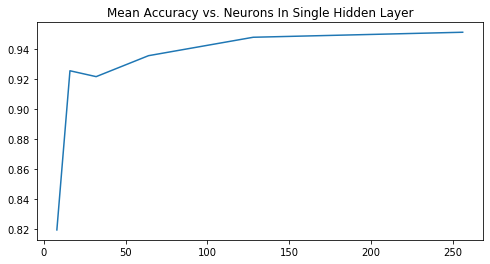

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

nn_one_neurons = [
    (8,),
    (16,),
    (32,),
    (64,),
    (128,),
    (256,)
]
nn_one_accuracies = []

for n in nn_one_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_one_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Single Hidden Layer")

x = [i[0] for i in nn_one_neurons]
plt.plot(x, nn_one_accuracies)

### Summary:

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 86% to approximately 94%. 

Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 96% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

## Neural Networks with two hidden layers

Let's try using two hidden layers and continue to increase the number of neurons in each layer.

Steps:

 - Modify the neural network training pipeline to use 2 hidden layers instead in the network.
 - Using 4-fold cross validation:
 - Train a neural network model using 2 hidden layers:
   - 64 neurons in the first hidden layer.
   - 64 neurons in the second hidden layer.
   
Summarize what we see:
 - Rank the performance of the models by the overall accuracies.
 - Which models, if any, start to overfit?
 - For each model, you could compute and visualize the performance for both the train and test sets to understand how they diverged. Models that overfit tend to perform well on the train set but poorly on the test set.


/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


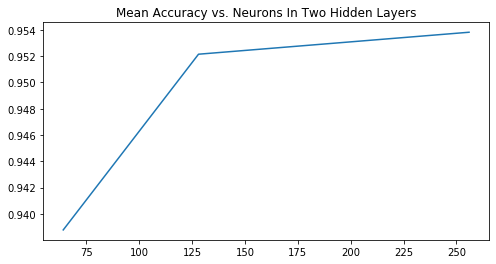

In [16]:
nn_two_neurons = [
    (64,64),
    (128, 128),
    (256, 256)
]
nn_two_accuracies = []

for n in nn_two_neurons:
    nn_accuracies = cross_validate(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_two_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Two Hidden Layers")

x = [i[0] for i in nn_two_neurons]
plt.plot(x, nn_two_accuracies)

In [17]:
nn_two_accuracies

[0.93878000494927, 0.9521417965850036, 0.9538121752041574]

### Summary
Using 2 hidden layers improved our simple accuracy to 95%. 

While I'd traditionally be worried about overfitting, using 4-fold cross validation also gives me a bit more assurance that the model is generalizing to achieve the extra 1% in simple accuracy over the single hidden layer networks we tried earlier.

## Neural Networks with three hidden layers

Using more hidden layers is known to increase the amount of overfitting that happens. 

To help us prevent overfitting, let's increase the number of folds we use for k-fold cross validation to 6 while testing networks with 3 hidden layers.

Steps:

Modify the neural network training pipeline to use 6 fold cross validation instead.
 - Train a neural network model using 3 hidden layers:
   - 10 neurons in the first hidden layer.
   - 10 neurons in the second hidden layer.
   - 10 neurons in the third hidden layer.
 - Train a neural network model using 3 hidden layers:
   - 64 neurons in the first hidden layer.
   - 64 neurons in the second hidden layer.
   - 64 neurons in the third hidden layer.
 - Train a neural network model using 3 hidden layers:
   - 128 neurons in the first hidden layer.
   - 128 neurons in the second hidden layer.
   - 128 neurons in the third hidden layer.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# 50% Train / test validation
def train_nn(neuron_arch, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes=neuron_arch)
    mlp.fit(train_features, train_labels)
    return mlp

def test(model, test_features, test_labels):
    predictions = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['correct_label'] = test_labels
    train_test_df['predicted_label'] = predictions
    overall_accuracy = sum(train_test_df["predicted_label"] == train_test_df["correct_label"])/len(train_test_df)    
    return overall_accuracy

def cross_validate_six(neuron_arch):
    fold_accuracies = []
    kf = KFold(n_splits = 6, random_state=2)
    for train_index, test_index in kf.split(data):
        train_features, test_features = data.loc[train_index], data.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
       
        model = train_nn(neuron_arch, train_features, train_labels)
        overall_accuracy = test(model, test_features, test_labels)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies

/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/otto/opt/anaconda3/envs/datasci/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarnin

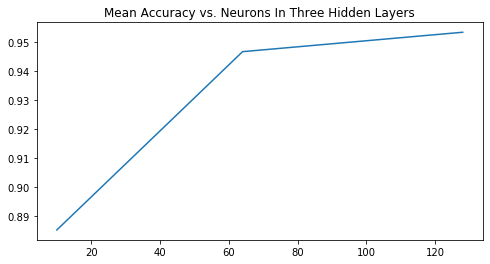

In [19]:
nn_three_neurons = [
    (10, 10, 10),
    (64, 64, 64),
    (128, 128, 128)
]

nn_three_accuracies = []

for n in nn_three_neurons:
    nn_accuracies = cross_validate_six(n)
    nn_mean_accuracy = np.mean(nn_accuracies)
    nn_three_accuracies.append(nn_mean_accuracy)

plt.figure(figsize=(8,4))
plt.title("Mean Accuracy vs. Neurons In Three Hidden Layers")

x = [i[0] for i in nn_three_neurons]
plt.plot(x, nn_three_accuracies)

In [20]:
nn_three_accuracies

[0.8853753251579337, 0.9465923448532146, 0.9532608695652174]

### Summary
Using 3 hidden layers improved our simple accuracy to 96%, even with 6-fold cross validation. 

This seems to be in line with the research literature out there about deep neural networks for computer vision. 

Having more layers and more neurons tends to improve the network's performance.

## Next Steps


 - Use the existing pipeline you've built to try other machine learning models:
   - Decision Tree Models
   - Random Forest Models

 - Write up a summary of the effectiveness of the different models you tried, with data to back up your conclusions.

- Experiment with different activation functions to see if the accuracies improve.
 - Research some techniques for visualizing weights in neural network models and add a visualization step to your pipeline.
 [Visualization of MLP Weights on MNIST](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)

In future courses, we'd like to dive deeper into:

 - Image classification and computer vision
 - Higher performance tools for neural networks (like Tensorflow or PyTorch)
 - Different neural network architectures (like Convolutional Neural Networks)